# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import json
import io

In [2]:
df_tae = pd.read_csv('twitter-archive-enhanced.csv')

df_tae.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1195,717421804990701568,NaN,NaN,2016-04-05 18:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ebby. She's a Zimbabwean Feta. Embarra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717421804...,9,10,Ebby,NaN,NaN,NaN,NaN
945,752660715232722944,NaN,NaN,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752660715...,10,10,NaN,doggo,NaN,NaN,NaN
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,NaN,NaN,NaN,NaN
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,NaN,NaN,NaN,NaN
872,761371037149827077,NaN,NaN,2016-08-05 01:19:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Oh. My. God. 13/10 magical af h...,7.116948e+17,4.196984e+09,2016-03-20 23:23:54 +0000,https://twitter.com/dog_rates/status/711694788...,13,10,NaN,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

page = requests.get(url)
df_img = pd.read_csv(io.StringIO(page.content.decode('utf-8')), sep='\t')

with open('image-predictions.tsv', 'wb') as file:
    file.write(page.content)

df_img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat_belt,0.425176,False,Labrador_retriever,0.128128,True,Siamese_cat,0.091241,False
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
1329,757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False


3. Getting the tweepy API data from the file in the classroom due to both hardware and software limitations(tweet-json.txt)

In [4]:
df_json = pd.read_json('tweet-json.txt', lines=True)
df_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1670,2015-12-31 02:33:29+00:00,682389078323662849,682389078323662848,Meet Brody. He's a Downton Abbey Falsetto. Add...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 682388986111913984, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1828,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1570,2016-01-14 15:57:26+00:00,687664829264453632,687664829264453632,Meet Opal. He's a Belgian Dijon Poofster. Upse...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687664822905778177, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2121,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
586,2016-11-18 23:35:32+00:00,799757965289017345,799757965289017344,This is Sobe. She's a h*ckin happy doggo. Only...,False,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 799757951082721281, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9390,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
670,2016-10-22 22:42:52+00:00,789960241177853952,789960241177853952,RT @dog_rates: This is Buddy. His father was a...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Mon Aug 08 01:44:46 +0000 2016...,NaN,NaN,NaN
1013,2016-06-26 16:25:26+00:00,747103485104099331,747103485104099328,"Guys... I said DOGS with ""shark qualities"" or ...",False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 747103470537347072, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10534,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [6]:
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Quality issues
1. Must filter for original tweets in the datasets.

2. Missing data in columns.

3. Retweets and replies are present in the twitter-archive-enhanced.csv dataset, but only original tweets with ratings are required.

4. Some columns have incorrect data types. Such as:
    - tweet_id should isn't a string.
    - id_str isn't a string.
    - timestamp isn't a datetime object

5. The `name` column contains invalid or placeholder values are not actual dog names.

6. There may be duplicate rows in the datasets.

7. Some tweets in the image-predictions.tsv file might have the same image.

8. Some tweets have missing values in the `favorite_count` and `retweet_count` columns.


### Tidiness issues
1. Some columns in the datasets are not relevant to the analysis. For example, columns like retweeted_status_id, retweeted_status_user_id, and in_reply_to_status_id are not needed after filtering for original tweets.

2. The doggo, floofer, pupper and puppo columns should be merged as a single dog type column.

3. Some columns don't have any data.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [7]:
# Make copies of original pieces of data
df_json_clean = df_json.copy()
df_tae_clean = df_tae.copy()
df_img_clean = df_img.copy()

### Issue #1:

#### Define: Filtering for original tweets (not retweets or replies) by dropping any row whose retweeted_status_id & in_reply_to_status_id aren't null

#### Code

In [8]:
df_tae_clean = df_tae_clean[
    df_tae_clean['retweeted_status_id'].isnull() &
    df_tae_clean['in_reply_to_status_id'].isnull()
]

df_json_clean = df_json_clean[
    df_json_clean['retweeted_status'].isnull() &
    df_json_clean['in_reply_to_status_id'].isnull()
]

#### Test

In [9]:
# Check if there are any retweets or replies left
print(df_tae_clean['retweeted_status_id'].notnull().sum())      # Should be 0
print(df_tae_clean['in_reply_to_status_id'].notnull().sum())    # Should be 0
print(df_json_clean['retweeted_status'].notnull().sum())      # Should be 0
print(df_json_clean['in_reply_to_status_id'].notnull().sum())    # Should be 0

0
0
0
0


### Issue #2:

#### Define: Retweets and replies are present, but only original tweets with ratings are required so we will drop these columns.

#### Code

In [10]:
df_tae_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
df_json_clean.drop(columns=['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','is_quote_status','retweeted','retweeted_status'], inplace=True)

#### Test

In [11]:
df_tae_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [12]:
df_json_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source', 'user',
       'geo', 'coordinates', 'place', 'contributors', 'retweet_count',
       'favorite_count', 'favorited', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

### Issue #3:

#### Define: Some columns don't have much data like geo, coordinates, etc, so we will drop columns that have too many null values

#### Code

In [13]:
# Remove empty columns.
df_json_clean.drop(columns=['geo', 'place', 'coordinates', 'contributors', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str'], inplace=True)

#### Test

In [14]:
df_json_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source', 'user',
       'retweet_count', 'favorite_count', 'favorited', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

### Issue #4:

#### Define: There may be duplicate rows in the dataset so we will drop them.

#### Code

In [15]:
df_img_clean.drop_duplicates(inplace=True)
df_tae_clean.drop_duplicates(inplace=True)

#### Test

In [16]:
df_tae_clean.duplicated().sum()  # Should be 0
df_img_clean.duplicated().sum()  # Should be 0

0

### Issue #5:

#### Define: Some image predictions have duplicate images, so we are going to drop them.

#### Code

In [17]:
df_img_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [18]:
df_img_clean['jpg_url'].duplicated().sum()  # Should be 0

0

### Issue #6:

#### Define: The `name` column contains invalid or placeholder values such as "None", "a", "an" that are not actual dog names, so we will replace these with the word `dog`.

#### Code

In [19]:
df_tae_clean['name'].replace(['None','a','an', None, pd.NA], 'dog', inplace=True)

C:\Users\Bro\AppData\Local\Temp\ipykernel_11380\2460443739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tae_clean['name'].replace(['None','a','an', None, pd.NA], 'dog', inplace=True)


#### Test

In [20]:
df_tae_clean['name'].isna().sum()

0

### Issue #7:

#### Define: Some tweets have missing values in the `favorite_count` and `retweet_count` columns, so we will replace them with zero.

#### Code

In [21]:
df_json_clean[['favorite_count','retweet_count']].fillna(0, inplace=True)

C:\Users\Bro\AppData\Local\Temp\ipykernel_11380\564390385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json_clean[['favorite_count','retweet_count']].fillna(0, inplace=True)


#### Test

In [22]:
df_json_clean[['favorite_count','retweet_count']].isna().sum()  # Should be 0

favorite_count    0
retweet_count     0
dtype: int64

### Issue #8:

#### Define: The doggo, floofer, pupper and puppo columns should be merged as a single dog type column.

#### Code

In [23]:
# Combine doggo, floofer, pupper, puppo into a single 'dog_type' column
dog_type_cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_tae_clean['dog_type'] = df_tae_clean[dog_type_cols].apply(lambda row: ','.join([col for col in dog_type_cols if row[col] == col]), axis=1)
df_tae_clean['dog_type'].replace('', pd.NA, inplace=True)
df_tae_clean.drop(columns=dog_type_cols, inplace=True)

C:\Users\Bro\AppData\Local\Temp\ipykernel_11380\2681865646.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tae_clean['dog_type'].replace('', pd.NA, inplace=True)


#### Test

In [24]:
df_tae_clean['dog_type'].value_counts()

dog_type
pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: count, dtype: int64

### Issue #9:

#### Define: Some columns have incorrect data types such as "tweet_id", "id_str" and "timestamp", so we will correct them.

#### Code

In [25]:
# Convert tweet_id and id_str to string, and timestamp to datetime
df_tae_clean['tweet_id'] = df_tae_clean['tweet_id'].astype(str)
df_img_clean['tweet_id'] = df_img_clean['tweet_id'].astype(str)
df_json_clean['id_str'] = df_json_clean['id_str'].astype(str)

df_tae_clean['timestamp'] = pd.to_datetime(df_tae_clean['timestamp'])

#### Test

In [26]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [27]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2097 non-null   datetime64[ns, UTC]
 1   id                             2097 non-null   int64              
 2   id_str                         2097 non-null   object             
 3   full_text                      2097 non-null   object             
 4   truncated                      2097 non-null   bool               
 5   display_text_range             2097 non-null   object             
 6   entities                       2097 non-null   object             
 7   extended_entities              1971 non-null   object             
 8   source                         2097 non-null   object             
 9   user                           2097 non-null   object             
 10  retweet_count                

In [28]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_type            336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 163.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [29]:
# Merge the cleaned datasets on tweet_id
master_df = df_tae_clean.merge(df_img_clean, on='tweet_id', how='left').merge(
    df_json_clean, left_on='tweet_id', right_on='id_str', how='left'
)

# Drop the redundant 'id_str' column after merge
master_df.drop(columns=['id_str'], inplace=True)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight #1: The most popular dog stage is the doggo/puppo!

In [30]:
df = master_df[['dog_type','retweet_count']].copy()
df.groupby('dog_type').mean().sort_values(by='retweet_count', ascending=False)

,retweet_count
dog_type,
"doggo,puppo",19196.000000
"doggo,pupper",4928.166667
puppo,4852.125000
doggo,4760.976190
"doggo,floofer",3433.000000
floofer,2298.500000
pupper,2238.948718


### Insight #2: The most liked dog name is Stephan.

In [31]:
df = master_df[['name','retweet_count']].copy()
df.groupby('name').mean().sort_values(by='retweet_count', ascending=False).head(10)

,retweet_count
name,
Stephan,56625.000000
Seamus,24069.000000
Hurley,21324.000000
Lilly,19297.000000
quite,17324.000000
Aja,17300.000000
Zoey,16054.500000
Kenneth,16043.000000
Bo,15699.666667


### Insight #3: The most common dog breed is the golden retriever (according to the image predictions, and if they were correct)?

In [32]:
df = master_df[['p1','p1_dog','retweet_count']].copy()
df[df['p1_dog'] == True]['p1'].value_counts().sort_values(ascending=False).head(10)

p1
golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: count, dtype: int64

### Insights:
1. The most popular dog stage is the doggo/puppo.

2. The most liked dog name is Stephan.

3. The most common dog breed is the golden retriever (according to the image predictions, and if they were correct)?

## Visualization

### Pie chart of dog stages

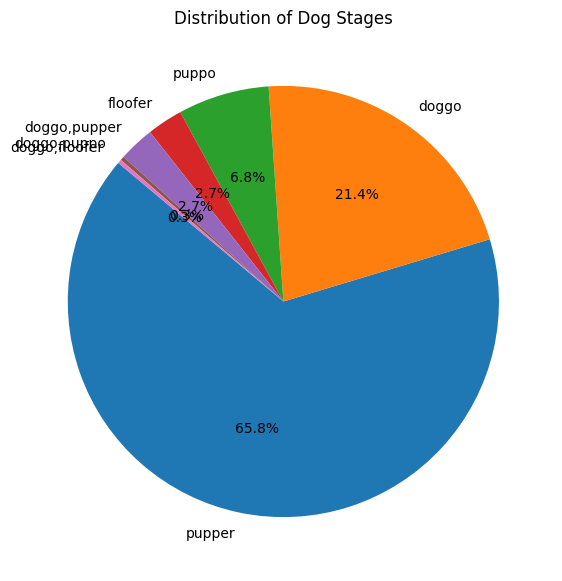

In [33]:
# Count the occurrences of each dog stage (dog_type), excluding missing values
dog_stage_counts = master_df['dog_type'].dropna().value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
dog_stage_counts.plot.pie(autopct='%1.1f%%', startangle=140, ylabel='', title='Distribution of Dog Stages')
plt.show()